In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./solutions_fourth_07_08.csv')
df.dropna(inplace=True)
df

,Unnamed: 0,fitness,solution,computed_on,generation,mesh-resoution
0,0,0.034371,[1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1...,"31.07.2023, 12:36:04",0.0,coarse
1,1,0.037928,[1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0...,"31.07.2023, 12:36:05",0.0,coarse
2,2,0.023190,[1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0...,"31.07.2023, 12:36:06",0.0,coarse
3,3,0.036509,[1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1...,"31.07.2023, 12:36:08",0.0,coarse
4,4,0.040309,[1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1...,"31.07.2023, 12:45:54",0.0,coarse
...,...,...,...,...,...,...
2904,2904,0.059019,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0...,"07.08.2023, 10:13:43",85.0,coarse
2905,2905,0.059136,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0...,"07.08.2023, 10:13:48",85.0,coarse
2906,2906,0.054888,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0...,"07.08.2023, 10:17:27",85.0,coarse
2907,2907,0.053245,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0...,"07.08.2023, 10:17:41",85.0,coarse


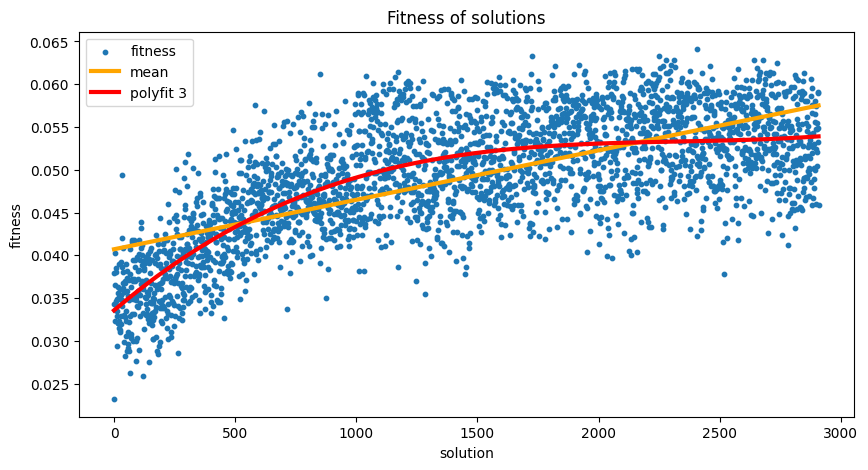

In [3]:
plt.figure(figsize=(10, 5))
# create scatter plot with small dots
plt.scatter(df.index, df['fitness'], label='fitness', s=10)
z = np.polyfit(df.index, df['fitness'], 1)
f = np.poly1d(z)
x_new = np.linspace(df.index[0], df.index[-1], 50)
y_new = f(x_new)
# create thick average line
plt.plot(x_new, y_new, color="orange", linewidth=3, label='mean')

# make polyfit of degree 3
z = np.polyfit(df.index, df['fitness'], 3)
f = np.poly1d(z)
x_new = np.linspace(df.index[0], df.index[-1], 50)
y_new = f(x_new)
plt.plot(x_new, y_new, color="red", linewidth=3, label='polyfit 3')


plt.legend()
plt.xlabel('solution')
plt.ylabel('fitness')
plt.title('Fitness of solutions')
plt.show()

In [4]:
# Convert the 'computed_on' column to datetime format
df['computed_on'] = pd.to_datetime(df['computed_on'], format='%d.%m.%Y, %H:%M:%S')

# Compute the time difference between each consecutive entry
df['time_diff'] = df['computed_on'].diff()

# Compute the average of these time differences
average_time_diff = df['time_diff'].mean()

print(average_time_diff)


0 days 00:03:25.262813897


In [5]:
min(df['fitness'])

0.0231901421295189

In [6]:
# add file name to the dataframe entries to find the files
df['fileName'] = df['solution'].apply(lambda x: x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace(' ',''))

In [7]:
# add image representation to dataframe
df['image_representation'] = df['fileName'].apply(lambda str_array: np.array([int(x) for x in str_array]).reshape(11, 11))

In [8]:
top_performers = df.sort_values(by="fitness", ascending=False)
# top_performers.iloc[0]['fileName']
top_performers

,Unnamed: 0,fitness,solution,computed_on,generation,mesh-resoution,time_diff,fileName,image_representation
2405,2405,0.064092,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0...,2023-08-06 11:06:36,70.0,coarse,0 days 00:00:06,0110101001001100111110000000100001010001000011...,"[[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [0, 1, 1, ..."
2250,2250,0.063302,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0...,2023-08-06 04:01:33,65.0,coarse,0 days 00:04:24,0110101001001100111011000000100001010000000001...,"[[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [0, 1, 1, ..."
1724,1724,0.063263,[1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0...,2023-08-04 07:20:44,50.0,coarse,0 days 00:00:20,1110101001001100111110000000100001010001000011...,"[[1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [0, 1, 1, ..."
2278,2278,0.062860,[0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0...,2023-08-06 05:19:07,66.0,coarse,0 days 00:03:49,0110101001011100111011000000100001010000000011...,"[[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 1, ..."
2677,2677,0.062826,[0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0...,2023-08-06 23:39:32,78.0,coarse,0 days 00:00:01,0110101001001100111110000000100001010001000001...,"[[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], [0, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...
92,92,0.027679,[1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0...,2023-07-31 17:40:40,2.0,coarse,0 days 00:05:55,1010010000110001111101000001110110010110101100...,"[[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 0, ..."
143,143,0.027586,[1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0...,2023-07-31 20:35:17,3.0,coarse,0 days 00:00:01,1101011101101100011000001000110110100100010011...,"[[1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], [0, 1, 1, ..."
67,67,0.026234,[1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1...,2023-07-31 15:28:35,1.0,coarse,0 days 00:10:15,1010100101100000001001101011011000000110011011...,"[[1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 0, ..."
118,118,0.025849,[1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0...,2023-07-31 19:39:09,3.0,coarse,0 days 00:03:42,1110110101100000101000001101110000101000110011...,"[[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], [0, 0, 0, ..."


In [9]:
# get the full file name
top_performers['fileName'].iloc[0]

'0110101001001100111110000000100001010001000011000101101001000110101001110000000100100010100000101010001101001010010100110'

# Make a heatmap of the most significant top and worst performers
Indicate by colour what the frequency of a block placed in that position is

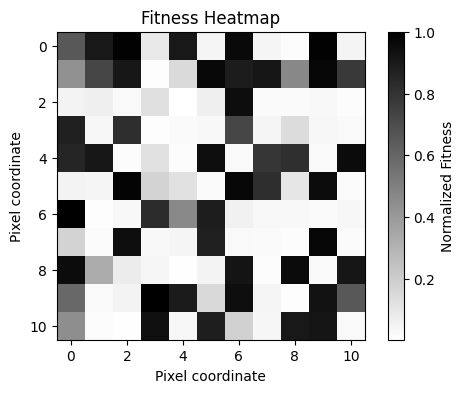

In [10]:
# Create the heatmap weights
# Assuming df is your DataFrame and 'image_representation' is your column
image_shape = df['image_representation'].iloc[0].shape
combined_array = np.zeros(image_shape)
# df['normalized_fitness'] = df['fitness']/np.linalg.norm(df['fitness']) 
df['normalized_fitness'] = (df['fitness'] - df['fitness'].min()) / (df['fitness'].max() - df['fitness'].min())

# itterate over the dataframe and create a weighted array
for index, row in df.iterrows():
    combined_array += row['image_representation'] * row['normalized_fitness']

# Normalize the combined array to [0, 1] range for better color representation in heatmap
combined_array /= np.max(combined_array)

# Create heatmap
plt.figure(figsize=(6, 4))
plt.imshow(combined_array, cmap='binary', interpolation='nearest')
plt.colorbar(label='Normalized Fitness')
plt.title('Fitness Heatmap')
plt.xlabel('Pixel coordinate')
plt.ylabel('Pixel coordinate')
# plt.tight_layout()
plt.savefig('fitness_heatmap.png', dpi=600, bbox_inches='tight')
# plt.show()


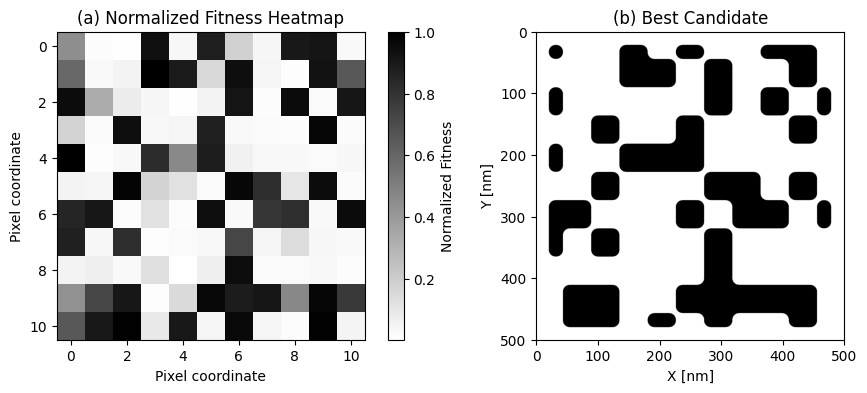

In [11]:
# Create the heatmap weights
# Assuming df is your DataFrame and 'image_representation' is your column
image_shape = df['image_representation'].iloc[0].shape
combined_array = np.zeros(image_shape)
# df['normalized_fitness'] = df['fitness']/np.linalg.norm(df['fitness']) 
df['normalized_fitness'] = (df['fitness'] - df['fitness'].min()) / (df['fitness'].max() - df['fitness'].min())

# itterate over the dataframe and create a weighted array
for index, row in df.iterrows():
    combined_array += row['image_representation'] * row['normalized_fitness']

# Normalize the combined array to [0, 1] range for better color representation in heatmap
combined_array /= np.max(combined_array)

# Create a 1x2 grid of plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the heatmap on the left subplot
im = ax[0].imshow(np.flipud(combined_array), cmap='binary', interpolation='nearest')
fig.colorbar(im, ax=ax[0], label='Normalized Fitness')
ax[0].set_title('(a) Normalized Fitness Heatmap')
ax[0].set_xlabel('Pixel coordinate')
ax[0].set_ylabel('Pixel coordinate')

# Display the picture on the right subplot
img = plt.imread('./0110101001001100111110000000100001010001000011000101101001000110101001110000000100100010100000101010001101001010010100110.png')  # Replace with the path to your image
ax[1].imshow(img, cmap='gray', extent=[0, 500, 500, 0])
ax[1].set_title('(b) Best Candidate')  # Replace with your image title
ax[1].set_xticks(np.linspace(0, 500, 6))  # This will give ticks at [0, 100, 200, 300, 400, 500]
ax[1].set_yticks(np.linspace(0, 500, 6))
ax[1].set_xlim(0, 500)
ax[1].set_ylim(500, 0)
ax[1].set_xlabel('X [nm]')
ax[1].set_ylabel('Y [nm]')
# ax[1].axis('off')  # Hide axes for the image

plt.subplots_adjust(wspace=0)
# plt.tight_layout()
plt.savefig('fitness_heatmap_w_best_candidate.png', dpi=600, bbox_inches='tight')
# plt.show()

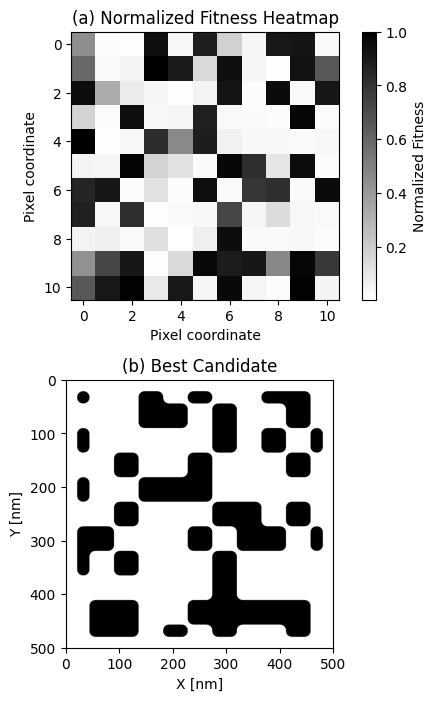

In [12]:
# Create the heatmap weights
# Assuming df is your DataFrame and 'image_representation' is your column
image_shape = df['image_representation'].iloc[0].shape
combined_array = np.zeros(image_shape)
# df['normalized_fitness'] = df['fitness']/np.linalg.norm(df['fitness']) 
df['normalized_fitness'] = (df['fitness'] - df['fitness'].min()) / (df['fitness'].max() - df['fitness'].min())

# itterate over the dataframe and create a weighted array
for index, row in df.iterrows():
    combined_array += row['image_representation'] * row['normalized_fitness']

# Normalize the combined array to [0, 1] range for better color representation in heatmap
combined_array /= np.max(combined_array)

# Create a 2x1 grid of plots for vertical stacking
fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# Plot the heatmap on the top subplot
im = ax[0].imshow(np.flipud(combined_array), cmap='binary', interpolation='nearest')
fig.colorbar(im, ax=ax[0], label='Normalized Fitness')
ax[0].set_title('(a) Normalized Fitness Heatmap')
ax[0].set_xlabel('Pixel coordinate')
ax[0].set_ylabel('Pixel coordinate')

# Display the picture on the bottom subplot
img = plt.imread('./0110101001001100111110000000100001010001000011000101101001000110101001110000000100100010100000101010001101001010010100110.png')
ax[1].imshow(img, cmap='gray', extent=[0, 500, 500, 0])
ax[1].set_title('(b) Best Candidate')
ax[1].set_xticks(np.linspace(0, 500, 6))
ax[1].set_yticks(np.linspace(0, 500, 6))
ax[1].set_xlim(0, 500)
ax[1].set_ylim(500, 0)
ax[1].set_xlabel('X [nm]')
ax[1].set_ylabel('Y [nm]')

# Adjust the space between the subplots
plt.subplots_adjust(hspace=0.3)  # Adjust this value as needed

plt.savefig('fitness_heatmap_w_best_candidate.png', dpi=600, bbox_inches='tight')
plt.show()


### Only take the first n (sorted by time) and make a fitness heatmap

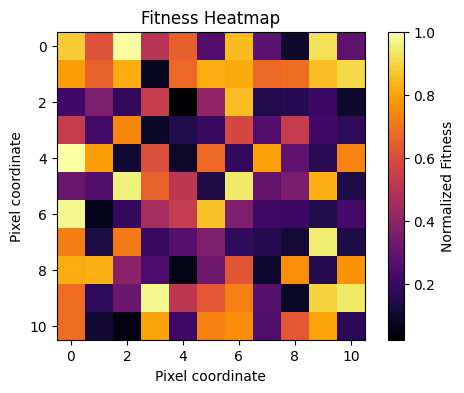

In [13]:
# Create the heatmap weights
# Assuming df is your DataFrame and 'image_representation' is your column
image_shape = df['image_representation'].iloc[0].shape
combined_array = np.zeros(image_shape)
# df['normalized_fitness'] = df['fitness']/np.linalg.norm(df['fitness']) 
df['normalized_fitness'] = (df['fitness'] - df['fitness'].min()) / (df['fitness'].max() - df['fitness'].min())

# itterate over the dataframe and create a weighted array
for index, row in df.head(725).iterrows():
    combined_array += row['image_representation'] * row['normalized_fitness']

# Normalize the combined array to [0, 1] range for better color representation in heatmap
combined_array /= np.max(combined_array)

# Create heatmap
plt.figure(figsize=(6, 4))
plt.imshow(combined_array, cmap='inferno', interpolation='nearest')
plt.colorbar(label='Normalized Fitness')
plt.title('Fitness Heatmap')
plt.xlabel('Pixel coordinate')
plt.ylabel('Pixel coordinate')
# plt.tight_layout()
plt.savefig('fitness_heatmap.png', dpi=600, bbox_inches='tight')
# plt.show()
